# Classificação de sobreviventes do Titanic com Decision Tree

In [3]:
#importando bibliotecas nescessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export

### Conhecendo a base dados

Fonte do Dataset: <a href="https://www.kaggle.com/hesh97/titanicdataset-traincsv" margin-left='5'>Titanic-Dataset</a>


O **Titanic Dataset** é uma base de dados conhecida nos estudos de data science, possue informações sobre o famoso acidente com o navio titanic. Esse dataset é comumente usado para pasa analise exploratória, mas neste estudo de caso o objetivo é fazer uma "previsão do passado" usando alguns dados para dizer se a pessoa sobreviveria caso estivesse presente no dia do desastre.

<img width="450px" height="200px" src="assets/imgs/titanic.jpg"/>

<a href="https://pt.wikipedia.org/wiki/RMS_Titanic" margin-left='5%'>Fonte da imagem</a>

In [4]:
#recebendo dataset
data = pd.read_csv('assets/dataset/titanic.csv')
#exibindo as primeiras linhas do dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dados**

* PassagerId: ID do passageiro, Numérico

* Survived: Sobrevivente, Categórico
    * 1 - Sobreviveu
    * 0 - Não sobreviveu
* Pclass: Classe da passagem, Categórito
    * 1 - Melhor classe
    * 2 - Media classe
    * 3 - Pior classe
* Name: Nome do passageiro

* Sex: Sexo, Categórico
    * male / homem
    * female / mulher
* Age: idade, Numérico

* SibSp: irmãos ou parceiros a bordo, Numérico

* Parch: pais e filhos a bordo, Numérico

* Ticket: codigo do ticket

* Fare: valor da passagem, Numérico

* Cabin: codgo da cabine

* Embarked: local onde embarcou, categorico

Neste Estudo serão usadas as colunas **Pclass**, **Sex** e **Age** como atributos, e a coluna **Survived** para as classes

In [5]:
#tamanho do dataset
nLinhas, nColunas = data.shape
print(f'Existem {nLinhas} linhas e {nColunas} colunas')

Existem 891 linhas e 12 colunas


### Definindo funções de auxilio

In [6]:
#Definindo função para plotar grafico de comparacao
def  graf_importances(x,y):
    plt.suptitle('Grau de importancia dos atributos\n Gerado pelo modelo')
    plt.ylabel('Grau')
    plt.xlabel('Atributo')

    plt.bar(x[0],y[0])
    plt.bar(x[1],y[1])
    plt.bar(x[2],y[2])
    plt.show()

### Preparando os dados

In [7]:
#Removendo atributos que não farão parte do processo de predição
nData = data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
nData.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0


O Algoritmo Decission Tree precisa receber dados de entrada numéricos para criar o modelo de predição, o atributo **Sex** possue dados categóricos havendo a nescecidade de converte-los

In [8]:
#transformando dados categóricos em dados numéricos  
encoder = LabelEncoder()
nData['Sex'] = encoder.fit_transform(nData['Sex'])
nData.head(3)

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0


O atributo **sex** passa a responder por:
 * 0 (female)
 * 1 (male)

In [9]:
#verificando se a base de dados possue valores faltantes
nData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

Foram verificados 177 valores faltantes no atributo **Age**, para este estudo serão removidas todas as linhas que estiverem com dados faltantes

In [10]:
#Removendo linhas do dados faltantes
nData = nData.dropna()
nData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [11]:
#verificando o atual tamanho do dataset
nLinhas, nColunas = nData.shape
print(f'Existem {nLinhas} linhas e {nColunas} colunas')

Existem 714 linhas e 4 colunas


In [12]:
#Dividindo dataset em dados de entrada(x) e saida(y) 
x,y = nData,nData['Survived']
x = x.drop(['Survived'],axis=1)

#Dividindo dados de entrada(x) e saida(y) em dados de treino(x_train,y_train) e teste(x_test,y_test) 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

### Treinando modelo

In [13]:
#criando
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
#prevendo dados de teste
predicoes = modelo.predict(x_test)

#vendo a acurácia do modelo
acc = accuracy_score(predicoes,y_test)
print('O modelo tem %.2f de acurácia' % acc) 

O modelo tem 0.83 de acurácia


### Explorando resultados

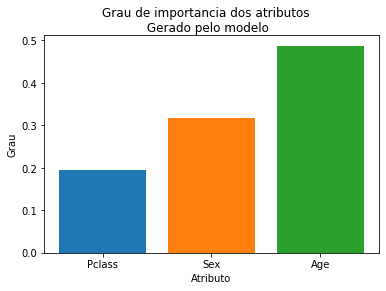

In [15]:
#Grau de importancia dos atributos encontrados pela Decison  Tree
atributos = ['Pclass','Sex','Age']
importancia = modelo.feature_importances_
relacao = [atributos,importancia]

graf_importances(atributos,importancia)

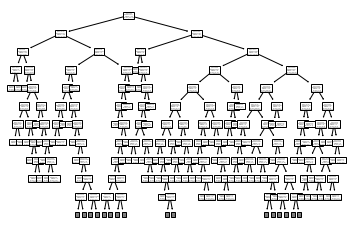

In [16]:
#arvore de decisao gerada
class_names = ['NSobrevivou','Sobrevivou']
tree = export.plot_tree(modelo,
                feature_names=atributos,
                class_names=class_names,
                max_depth=10,)

### Teste o Algoritmo

In [17]:
sexo = float(input('sexo - 0 (mulher), 1 (homen): '))
idade = float(input('idade: '))
pclasse = float(input('Classe que entraria: '))


entradas = [[pclasse,sexo,idade]]
tipo = modelo.predict(entradas)[0]
resultado = None
if tipo == 0:
    resultado = 'Não sobreviveria'
else:
    resultado = 'Sobreviveria'
    
print('\nVoce provavelmente',resultado)

sexo - 0 (mulher), 1 (homen): 1
idade: 22
Classe que entraria: 1

Voce provavelmente Não sobreviveria
